# Select an isochrone from the mass metallicity relation
Kirby et al. 2013 (2013 ApJ 779 102) gives for nearby dSph and dIrr galaxies with masses $3<M^*<9$:

$
⟨[{\rm Fe/H}]⟩ = (−1.69 \pm 0.04)+(0.30 \pm 0.02) \log (􏰁M􏰂^∗ / 10^6 M_\odot)
$

Intrinsic scatter is about 0.1 dex.  The same slope and small scatter is found by Hidalgo+17 for a somewhat different sample. 

The Kirby paper also gives distributions of metallicity within galaxies, fit to chemical evolution models. That's a bridge to far for these simulations at the moment. 

In [1]:
import numpy as np
from scipy import stats
from astropy.table import Table

In [2]:
# Matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [10, 10]

The class below will set up distribution functions in metallicity and age. For metallicity, use the Kirby relation. For now, we'll just use a Gaussian in age. Include a method to select the isochrone file and optionally read it in, and a method to select a random age and return just the rows of the isochrone table with the closest age.

In [11]:
class isochrone_picker:
    def __init__(self,isochrone_dir='MIST_v1.2_vvcrit0.4_HSC',
                isofilestring='MIST_v1.2_feh_%s%3.2f_afe_p0.0_vvcrit0.4_HSC.iso.cmd'):
        # Mass-metallicity relation from Kirby et al. 2013 (2013 ApJ 779 102)
        self.c0 = -1.69
        self.c1 = 0.30
        self.sigma = 0.1
        self.Zscatter = stats.t(loc=0,scale=self.sigma,df=5) # With a bit more tail than Gaussian
        self.isodir = isochrone_dir+"/"
        self.metallicities = np.array(
            [-4.,-3.5,-3.,-2.5,-2.,-1.75,-1.5,-1.25,-1.,-0.75,-0.5,-0.25,0.,0.25,0.5])
        self.isofilestring = isofilestring
        # Ages just assume Gaussian with a mean & scatter
        self.meanage = 11.
        self.agesigma = 2.
        self.agescatter = stats.t(loc=self.meanage,scale=self.agesigma,df=5) 
    def pick_metallicity(self,logmass):
            return self.c1*(logmass-6)+self.c0 + self.Zscatter.rvs(len(logmass))
    def pick_age(self,logmass):
            return self.agescatter.rvs(len(logmass))*1.e9 # Gyr
    def pick_isofile(self,logmass,return_table=False):
        random_metallicity = self.pick_metallicity(np.array([logmass]))[0] # get back a float
        i = np.array(np.abs(random_metallicity-self.metallicities)).argmin()
        feh = self.metallicities[i]
        if feh < 0:
            self.isofile = self.isodir+self.isofilestring % ('m',-feh)
        else:
            self.isofile = self.isodir+self.isofilestring % ('p',feh)
        self.feh = feh
        if return_table:
            t = Table.read(self.isofile,format='ascii.commented_header',header_start=-1)
            return t
        else:
            return self.isofile

    def agerows(self,logmass,isotable):
        random_age = self.pick_age(np.array([logmass]))[0]
        logage = np.log10(random_age)
        print(random_age/1.e9,logage)
        i = np.array(np.abs(logage-isotable['log10_isochrone_age_yr'])).argmin()
        selected_age = isotable['log10_isochrone_age_yr'][i] 
        tt = t[np.isclose(isotable['log10_isochrone_age_yr'],selected_age)]
        self.age = 10.**logage/1.e9 # Gyr
        return tt

In [3]:
# Test the script version of this
from isochrone_picker import isochrone_picker

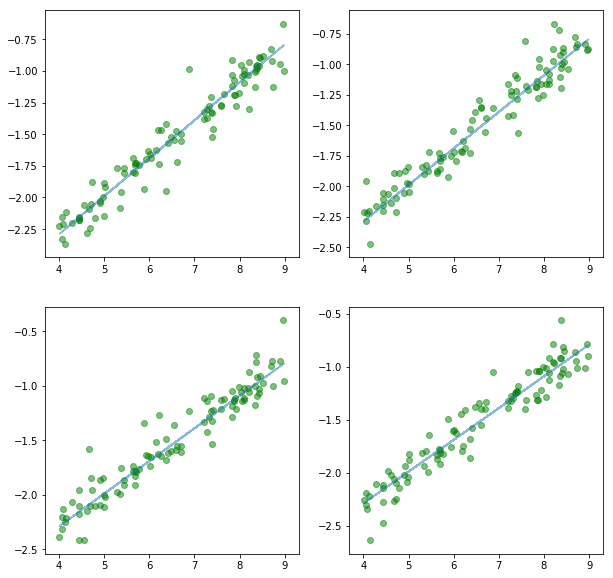

In [13]:
mp = isochrone_picker()
masses = np.random.uniform(4,9,size=100)
x = masses
y = -1.69+0.3*(x-6)
plt.subplot(221)
plt.plot(x,y,alpha=0.5)
plt.scatter(masses,mp.pick_metallicity(masses),color='g',alpha=0.5)
plt.subplot(222)
plt.plot(x,y,alpha=0.5)
plt.scatter(masses,mp.pick_metallicity(masses),color='g',alpha=0.5)
plt.subplot(223)
plt.plot(x,y,alpha=0.5)
plt.scatter(masses,mp.pick_metallicity(masses),color='g',alpha=0.5)
plt.subplot(224)
plt.plot(x,y,alpha=0.5)
plt.scatter(masses,mp.pick_metallicity(masses),color='g',alpha=0.5)

In [4]:
mp = isochrone_picker()
masses = np.random.uniform(4,9,size=10)
fnames=[]
for m in masses:
    filename = mp.pick_isofile(m)
    print(m,filename)
    fnames += [filename]

4.038898245988483 MIST_v1.2_vvcrit0.4_HSC/MIST_v1.2_feh_m2.00_afe_p0.0_vvcrit0.4_HSC.iso.cmd
7.5684716945923345 MIST_v1.2_vvcrit0.4_HSC/MIST_v1.2_feh_m1.25_afe_p0.0_vvcrit0.4_HSC.iso.cmd
4.274138921380061 MIST_v1.2_vvcrit0.4_HSC/MIST_v1.2_feh_m2.00_afe_p0.0_vvcrit0.4_HSC.iso.cmd
7.654409971716439 MIST_v1.2_vvcrit0.4_HSC/MIST_v1.2_feh_m1.25_afe_p0.0_vvcrit0.4_HSC.iso.cmd
5.286576492003286 MIST_v1.2_vvcrit0.4_HSC/MIST_v1.2_feh_m2.00_afe_p0.0_vvcrit0.4_HSC.iso.cmd
8.756216760431933 MIST_v1.2_vvcrit0.4_HSC/MIST_v1.2_feh_m1.00_afe_p0.0_vvcrit0.4_HSC.iso.cmd
4.175064385007103 MIST_v1.2_vvcrit0.4_HSC/MIST_v1.2_feh_m2.50_afe_p0.0_vvcrit0.4_HSC.iso.cmd
7.09646320064314 MIST_v1.2_vvcrit0.4_HSC/MIST_v1.2_feh_m1.50_afe_p0.0_vvcrit0.4_HSC.iso.cmd
8.256995266857079 MIST_v1.2_vvcrit0.4_HSC/MIST_v1.2_feh_m1.00_afe_p0.0_vvcrit0.4_HSC.iso.cmd
4.073645416087783 MIST_v1.2_vvcrit0.4_HSC/MIST_v1.2_feh_m2.50_afe_p0.0_vvcrit0.4_HSC.iso.cmd


In [5]:
mass = 7.2
t = mp.pick_isofile(mass,return_table=True)
t[:5]

EEP,log10_isochrone_age_yr,initial_mass,star_mass,log_Teff,log_g,log_L,[Fe/H]_init,[Fe/H],hsc_g,hsc_r,hsc_i,hsc_z,hsc_y,hsc_nb816,hsc_nb921,phase
int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
23,5.0,0.1,0.09999998136687994,3.5427031188567955,3.210428768323457,-0.6468244606237612,-1.25,-1.220527,8.473141,7.094691,6.365424,6.141344,5.861588,6.185448,5.945092,-1.0
24,5.0,0.10066920442769275,0.10066918557669904,3.543016255117741,3.2096709498110747,-0.6424572764932924,-1.25,-1.220527,8.458924,7.081769,6.354055,6.130628,5.851138,6.174497,5.934552,-1.0
25,5.0,0.10461878640983333,0.1046187662480489,3.5448521921953655,3.205137570832245,-0.6166704144474642,-1.25,-1.220527,8.374981,7.005424,6.286964,6.067418,5.789455,6.109967,5.87237,-1.0
26,5.0,0.10855509958214649,0.10855507805492264,3.5466583877705506,3.200760471522933,-0.5912055285386061,-1.25,-1.220527,8.2925,6.930487,6.220953,6.005384,5.728714,6.046454,5.811133,-1.0
27,5.0,0.11248670259911608,0.11248667964917562,3.54843725557967,3.1965089759655054,-0.5659921458181377,-1.25,-1.220527,8.211339,6.856853,6.155862,5.944183,5.66871,5.983681,5.750688,-1.0


In [7]:
mp.agerows(mass,t)[:5]

13.949718432763758 10.144565441707746


EEP,log10_isochrone_age_yr,initial_mass,star_mass,log_Teff,log_g,log_L,[Fe/H]_init,[Fe/H],hsc_g,hsc_r,hsc_i,hsc_z,hsc_y,hsc_nb816,hsc_nb921,phase
int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
251,10.150000000000002,0.1,0.09999887580527855,3.52710308938788,5.326309848046275,-2.8251104596427856,-1.0,-0.974225,14.400654,12.850927,11.843636,11.550541,11.276881,11.67255,11.339361,0.0
252,10.150000000000002,0.10177911480797494,0.10177795015685197,3.5283749892487175,5.320977974982168,-2.8084253498851153,-1.0,-0.974151,14.327907,12.787945,11.794757,11.50721,11.234207,11.625216,11.297073,0.0
253,10.150000000000002,0.10524166572717475,0.10524041830559142,3.530850546784352,5.310589340925848,-2.7759401764151503,-1.0,-0.973985,14.190974,12.667624,11.700068,11.423057,11.15134,11.533462,11.21489,0.0
254,10.150000000000002,0.10855693696939939,0.10855560524276293,3.5332209118281175,5.300627294002203,-2.7448210529894457,-1.0,-0.97381,14.062931,12.555933,11.610107,11.342762,11.072275,11.446177,11.136396,0.0
255,10.150000000000002,0.11173650738348764,0.11173508988934283,3.5354943218573354,5.2910581883237136,-2.714960605129663,-1.0,-0.973645,13.942577,12.4492,11.524866,11.266048,10.996737,11.362686,11.061295,0.0


In [8]:
mp.age,mp.feh,mp.isofile

(13.94971843276374,
 -1.0,
 'MIST_v1.2_vvcrit0.4_HSC/MIST_v1.2_feh_m1.00_afe_p0.0_vvcrit0.4_HSC.iso.cmd')

In [20]:
mp.pick_isofile(9)

'MIST_v1.2_vvcrit0.4_HSC/MIST_v1.2_feh_m0.75_afe_p0.0_vvcrit0.4_HSC.iso.cmd'